# Gausian beam estimates for CMB-S4

We use Goldsmith's equation 6.41, the FWHM for a truncated gaussian

$$ \theta_{fwhm} = [1.02 + 0.0135 T_e] \frac{\lambda}{D} $$

where $T_e$ is the edge taper in decibels.

The SAT values for $T_e$ come from the SAT group.  For the LATs I use MF horn simulations from Sara Simon to derive edge tapers for the MF_1 and MF_2 channels.

Still to do:  Scale those to the other LAT channels, using horn size and center frequency.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

In [6]:
c = 3e8 # mm/sec

tels = ['sat','chlat','splat']
sat_bands =         ['LF1','LF2','MF1_1','MF2_1','MF1_2','MF2_2','HF1','HF2']
chlat_bands =       ['LF1','LF2','MF1',  'MF2',                  'HF1','HF2']
splat_bands = ['ULF','LF1','LF2','MF1',  'MF2',                  'HF1','HF2']

centers = {'ULF':20.0,'LF1':24.75,'LF2':36.65,'MF1':91.5,'MF2':148.5,'MF1_1':85.,'MF2_1':95,'MF1_2':145.,'MF2_2':155.,'HF1':227.,'HF2':285.5}

# From SAT parameters table, 3/25/2023.  LF ones are grayed out, LF_2 is <15 so I'm using 15 here.
sat_edge_tapers={'LF1':9.3,'LF2':15.,'MF1_1':8.69,'MF2_1':9.93,'MF1_2':16.58,'MF2_2':13.82,'HF1':9.93,'HF2':12.8} # dB
lat_edge_tapers={'ULF':5.,'LF1':5.,'LF2':3.,'MF1':4, 'MF2':2.,'HF1':10.,'HF2':17.} # dB


info = {}

for tel in tels:
    info[tel]={}
    if tel == 'sat':
        for band in sat_bands:
            info[tel][band]={}
            info[tel][band]['center']=centers[band]
            info[tel][band]['taper']=sat_edge_tapers[band]
            info[tel][band]['D']=0.560  #mm
            # Lines below used for Si lenses.
            #if (band == 'HF1' or band == 'HF2'):
            #    info[tel][band]['D']=0.445 # mm
                
    if tel == 'chlat':
        for band in chlat_bands:
            info[tel][band]={}
            info[tel][band]['center']=centers[band]
            info[tel][band]['taper']=lat_edge_tapers[band]
            info[tel][band]['D']=5.7 # meter aperture illuminated

    if tel == 'splat':
        for band in splat_bands:
            info[tel][band]={}
            info[tel][band]['center']=centers[band]
            info[tel][band]['taper']=lat_edge_tapers[band]
            info[tel][band]['D']=4.8 # meter aperture illuminated

In [7]:
for tel in tels:
    print(tel + '------------')
    for band in info[tel].keys():
        D = info[tel][band]['D']
        lam = c/(info[tel][band]['center']*1e9)
        fwhm_airy = 1.028*lam/D  # This is the FWHM of the Airy pattern (1.22 is the radius of first null.)
        fwhm_airy = fwhm_airy*(60*180./np.pi)
        fwhm_goldsmith = (1.02 + 0.0135*info[tel][band]['taper'])*(lam/D) * (60*180./np.pi)
        print(band + ': Airy = {0:4.1f},  Gauss+taper = {1:4.1f}'.format(fwhm_airy,fwhm_goldsmith))

sat------------
LF1: Airy = 76.5,  Gauss+taper = 85.2
LF2: Airy = 51.7,  Gauss+taper = 61.4
MF1_1: Airy = 22.3,  Gauss+taper = 24.6
MF2_1: Airy = 19.9,  Gauss+taper = 22.4
MF1_2: Airy = 13.1,  Gauss+taper = 15.8
MF2_2: Airy = 12.2,  Gauss+taper = 14.3
HF1: Airy =  8.3,  Gauss+taper =  9.4
HF2: Airy =  6.6,  Gauss+taper =  7.7
chlat------------
LF1: Airy =  7.5,  Gauss+taper =  8.0
LF2: Airy =  5.1,  Gauss+taper =  5.2
MF1: Airy =  2.0,  Gauss+taper =  2.1
MF2: Airy =  1.3,  Gauss+taper =  1.3
HF1: Airy =  0.8,  Gauss+taper =  0.9
HF2: Airy =  0.7,  Gauss+taper =  0.8
splat------------
ULF: Airy = 11.0,  Gauss+taper = 11.7
LF1: Airy =  8.9,  Gauss+taper =  9.4
LF2: Airy =  6.0,  Gauss+taper =  6.2
MF1: Airy =  2.4,  Gauss+taper =  2.5
MF2: Airy =  1.5,  Gauss+taper =  1.5
HF1: Airy =  1.0,  Gauss+taper =  1.1
HF2: Airy =  0.8,  Gauss+taper =  0.9


# LATs

Plot Sara's MF horn sims, use those to figure out $T_e$ for each band and telescope, then use those values in Goldsmith's formula to get beam widths.

chlat
MF1: edge_val=0.72 =>  edge_dB = -1.44dB
MF2: edge_val=0.45 =>  edge_dB = -3.50dB
splat
MF1: edge_val=0.76 =>  edge_dB = -1.22dB
MF2: edge_val=0.51 =>  edge_dB = -2.97dB


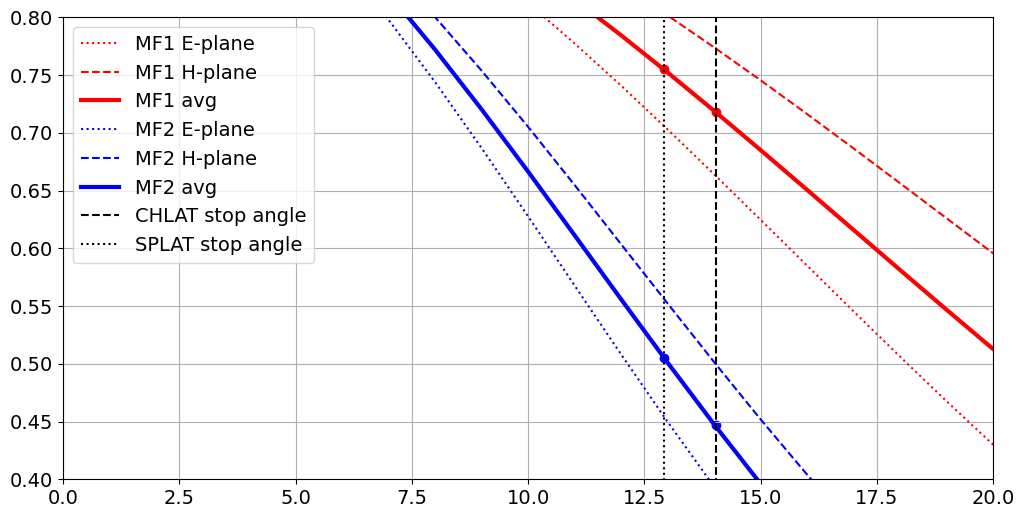

In [81]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 6]

tels = ['chlat','splat']
bands = ['MF1','MF2']

beam_info = {'chlat':{}, 'splat':{}}
beam_info['chlat']['fnum']=2.0  # estimate from Pato, March 2023
beam_info['splat']['fnum']=2.18 # New, March 2023
beam_info['chlat']['D'] = 5.8 #m
beam_info['splat']['D'] = 4.9 #m

for tel in tels:
    beam_info[tel]['MF1'] = {}
    beam_info[tel]['MF1']['center'] = 91.5
    beam_info[tel]['MF2'] = {}
    beam_info[tel]['MF2']['center'] = 148.5

beam_info['chlat']['MF1']['edge_val']= 0.718
beam_info['chlat']['MF2']['edge_val']= 0.447
beam_info['splat']['MF1']['edge_val']= 0.755
beam_info['splat']['MF2']['edge_val']= 0.505


for tel in tels:
    beam_info[tel]['theta'] = (180/np.pi)*np.arctan(1/(2*beam_info[tel]['fnum']))


beamdata = np.loadtxt('Horns/MF_v11_avg_beams.txt')
theta = np.arange(0,180)

plt.plot(beamdata[:,0],'r:',label='MF1 E-plane')
plt.plot(beamdata[:,1],'r--',label='MF1 H-plane')
plt.plot((beamdata[:,0]+beamdata[:,1])/2,'r',label='MF1 avg',linewidth=3)

plt.plot(beamdata[:,2],'b:',label='MF2 E-plane')
plt.plot(beamdata[:,3],'b--',label='MF2 H-plane')
plt.plot((beamdata[:,2]+beamdata[:,3])/2,'b',label='MF2 avg',linewidth=3)

plt.plot([theta_chlat,theta_chlat],[0,1.1],'k--',label='CHLAT stop angle')
plt.plot([theta_splat,theta_splat],[0,1.1],'k:',label='SPLAT stop angle')

plt.xlim(0,20)
plt.ylim(.4,.8)



for tel in tels:
    print(tel)
    for band in bands:
        beam_info[tel][band]['edge_dB']=10*np.log10(beam_info[tel][band]['edge_val'])
        print('{0:s}: edge_val={1:4.2f} =>  edge_dB = {2:4.2f}dB'.format(band,beam_info[tel][band]['edge_val'],beam_info[tel][band]['edge_dB']))

for tel in tels:
    for band in bands:
        if band=='MF1':
            pointcolor = 'red'
        else:
            pointcolor = 'blue'
        plt.scatter(beam_info[tel]['theta'],beam_info[tel][band]['edge_val'],color=pointcolor)
        
        beam_info[tel][band]


plt.legend()
plt.grid()

# Get beam widths
in arcminutes

In [80]:
for tel in tels:
    print('\n'+tel + '------------')
    for band in bands:
        D = beam_info[tel]['D']
        lam = c/(beam_info[tel][band]['center']*1e9)
        fwhm_airy = 1.028*lam/D  # This is the FWHM of the Airy pattern (1.22 is the radius of first null.)
        fwhm_airy = fwhm_airy*(60*180./np.pi)
        fwhm_goldsmith = (1.02 + 0.0135*beam_info[tel][band]['edge_dB'])*(lam/D) * (60*180./np.pi)
        print(band + ': Airy = {0:4.1f},  Gauss+taper = {1:4.1f}'.format(fwhm_airy,fwhm_goldsmith))


chlat------------
MF1: Airy =  2.0,  Gauss+taper =  1.9
MF2: Airy =  1.2,  Gauss+taper =  1.2

splat------------
MF1: Airy =  2.4,  Gauss+taper =  2.3
MF2: Airy =  1.5,  Gauss+taper =  1.4
